# Rellenar valores faltantes

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Criterio de borrado de columnas:
* Importante: En el caso de desastres naturales, a menos de que partiéramos de una situación 'apocalíptica', realmente no existe una cantidad sobredimensionada de eventos anuales.

Objetivos:

* Determinar con qué tipo de valores rellenar los faltantes
* Reindexar si es necesario
* Probar cómo responde dataset tras fillna de valores faltantes

Metodología basada en: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

## Importar librerías

In [1]:
# pip install pyjanitor matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot

In [11]:
import janitor
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

### Importar funciones personalizadas

In [15]:
# %run pandas-missing-extension.ipynb

## Cargar datos

In [12]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')
# encoding='utf8'
# dejar engine='python' para evitar advertencias

# Verificar carga de dataset

##  Resumen básico shape, info

In [13]:
df.shape
# Resultado: 16636 filas y 50 columnas)

(16636, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Associated Dis2    763 non-null    object 
 14  OFDA Response      1716 non-null   object 
 15  Appeal             2559 non-null   object 
 16  Declaration        334

# Exploración de valores faltantes

## Tabulación de valores faltantes

In [6]:
df.isna()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,AID Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16631,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16632,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16633,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16634,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True


In [18]:
df.isnull()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,AID Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16631,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16632,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16633,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
16634,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True


In [16]:
df.isna().sum()

Dis No                   0
Year                     0
Seq                      0
Disaster Subgroup        0
Disaster Type            0
Disaster Subtype      3323
Country                  0
ISO                      0
Region                   0
Continent                0
Location              1811
Origin               12551
Associated Dis       13043
Associated Dis2      15873
OFDA Response        14920
Appeal               14077
Declaration          13293
AID Contribution     15860
Dis Mag Value        11572
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Year               0
Start Month            395
End Year                 0
End Month              700
CPI                    106
dtype: int64

In [17]:
df.isnull().sum()

Dis No                   0
Year                     0
Seq                      0
Disaster Subgroup        0
Disaster Type            0
Disaster Subtype      3323
Country                  0
ISO                      0
Region                   0
Continent                0
Location              1811
Origin               12551
Associated Dis       13043
Associated Dis2      15873
OFDA Response        14920
Appeal               14077
Declaration          13293
AID Contribution     15860
Dis Mag Value        11572
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Year               0
Start Month            395
End Year                 0
End Month              700
CPI                    106
dtype: int64

### Columnas (numéricas y categóricas) con más valores faltantes

Columnas con nulls:
Disaster Subtype      3323
Location              1811
Origin               12551
Associated Dis       13043
Associated Dis2      15873
OFDA Response        14920
Appeal               14077
Declaration          13293
AID Contribution     15860
Dis Mag Value        11572
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Month            395
End Month              700
CPI                    106
dtype: int64

## Missingno para identificar datos faltantes

### Barplot

<Axes: >

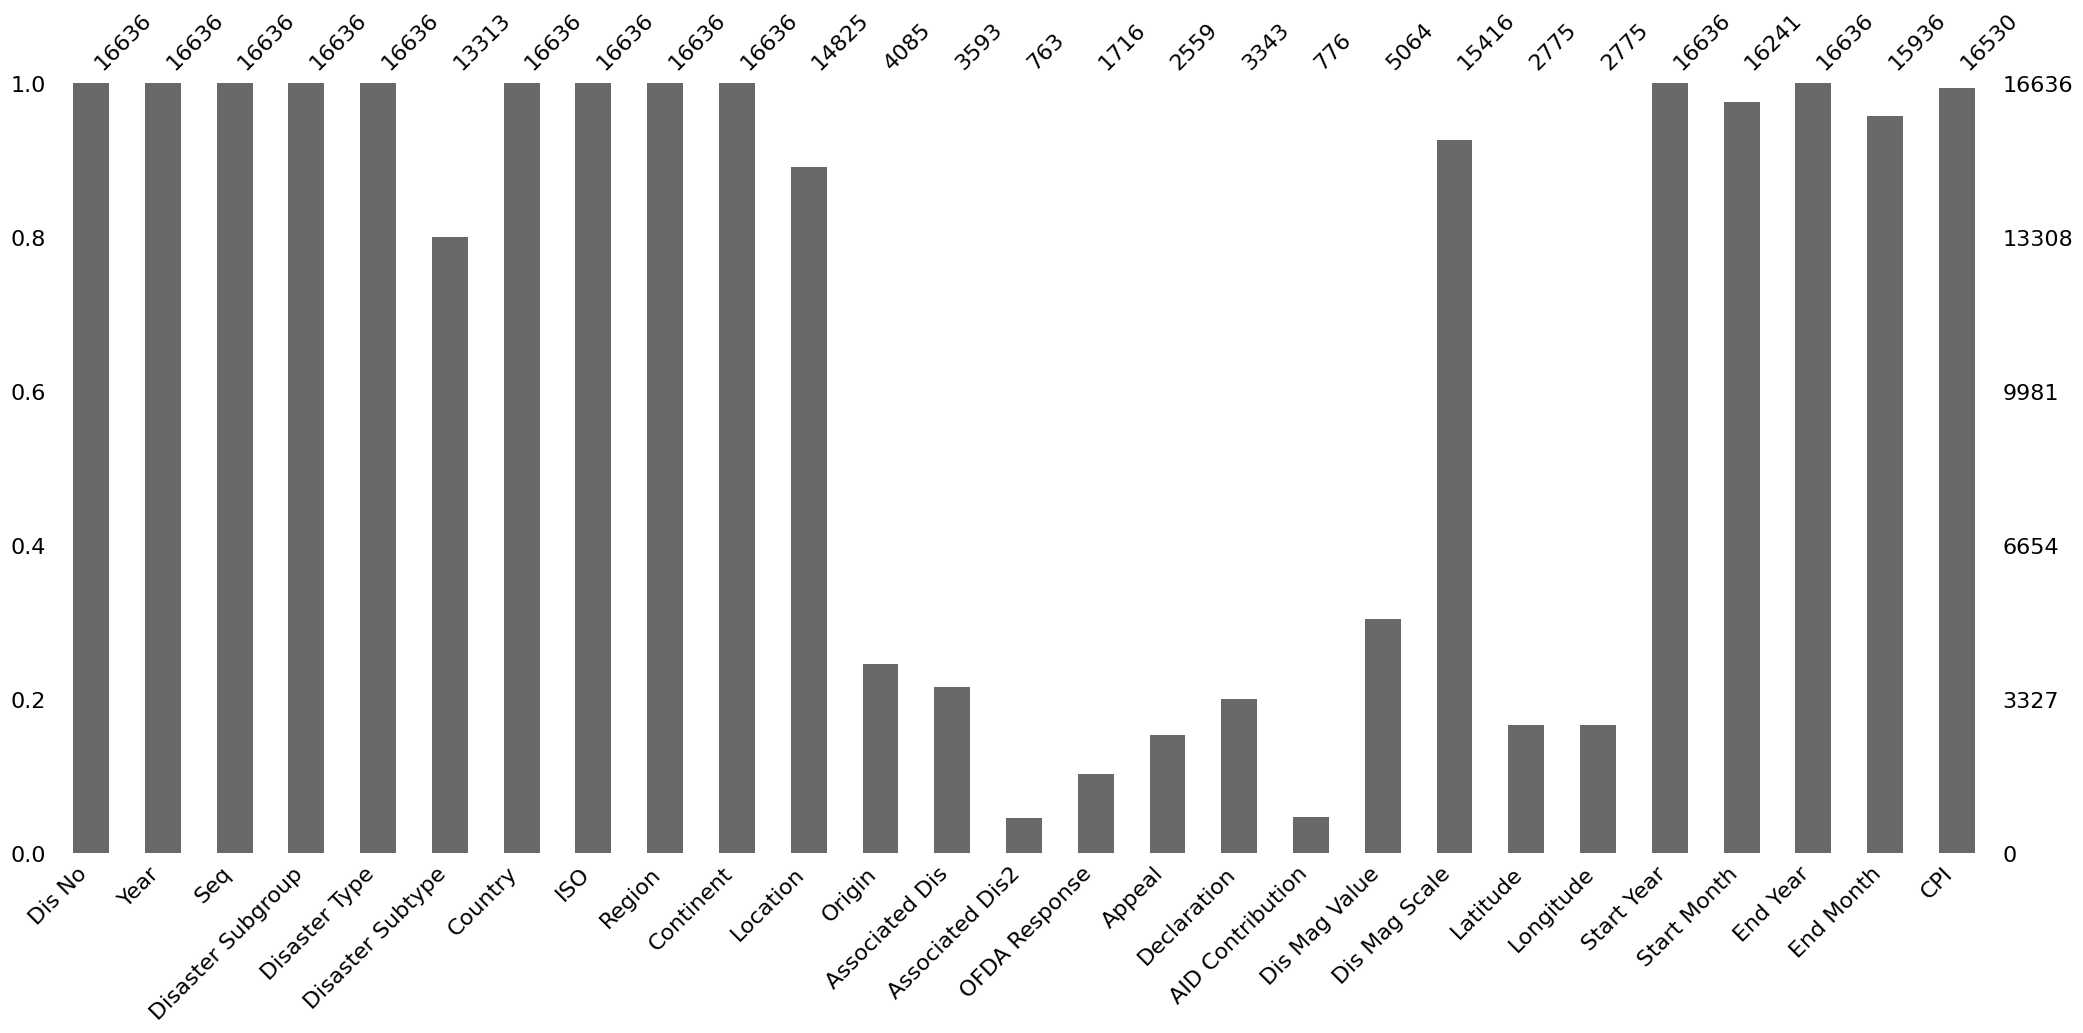

In [19]:
msno.bar(df)

### Matrix plot

<Axes: >

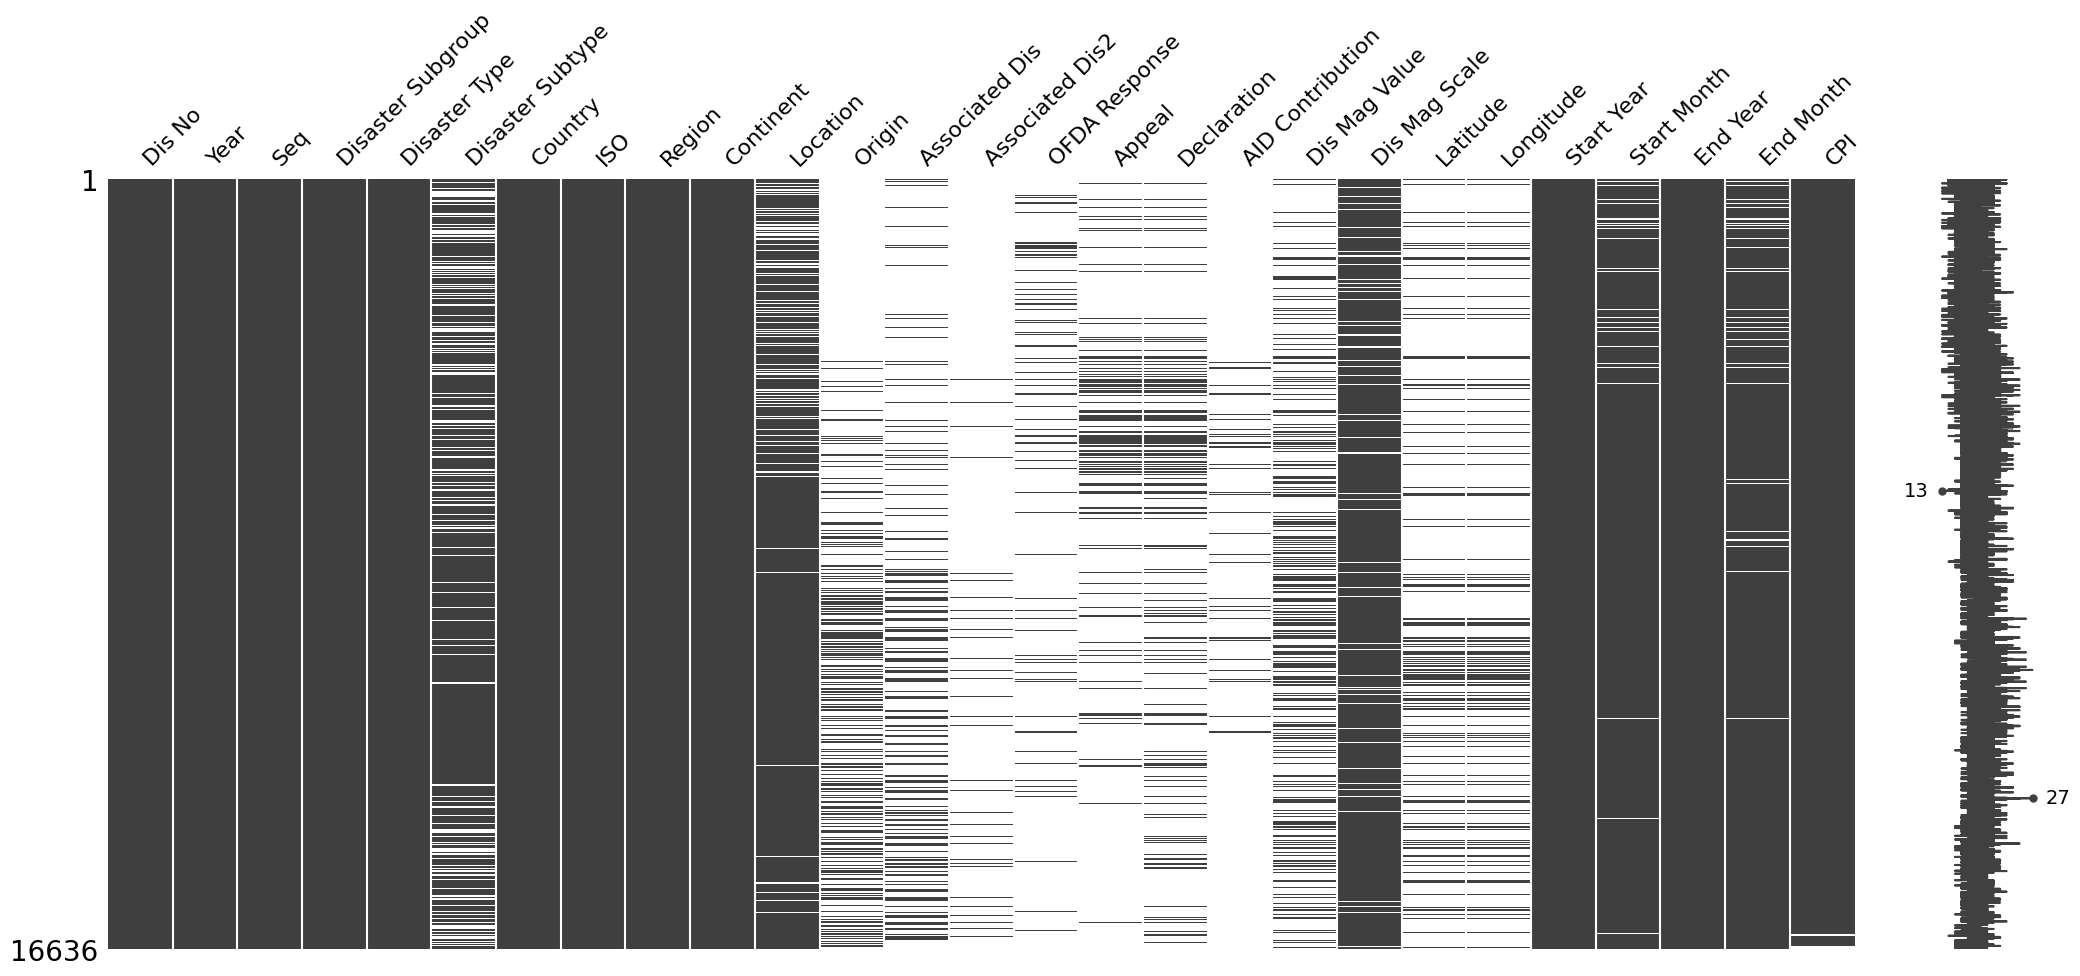

In [21]:
msno.matrix(df)

### Heatmap

<Axes: >

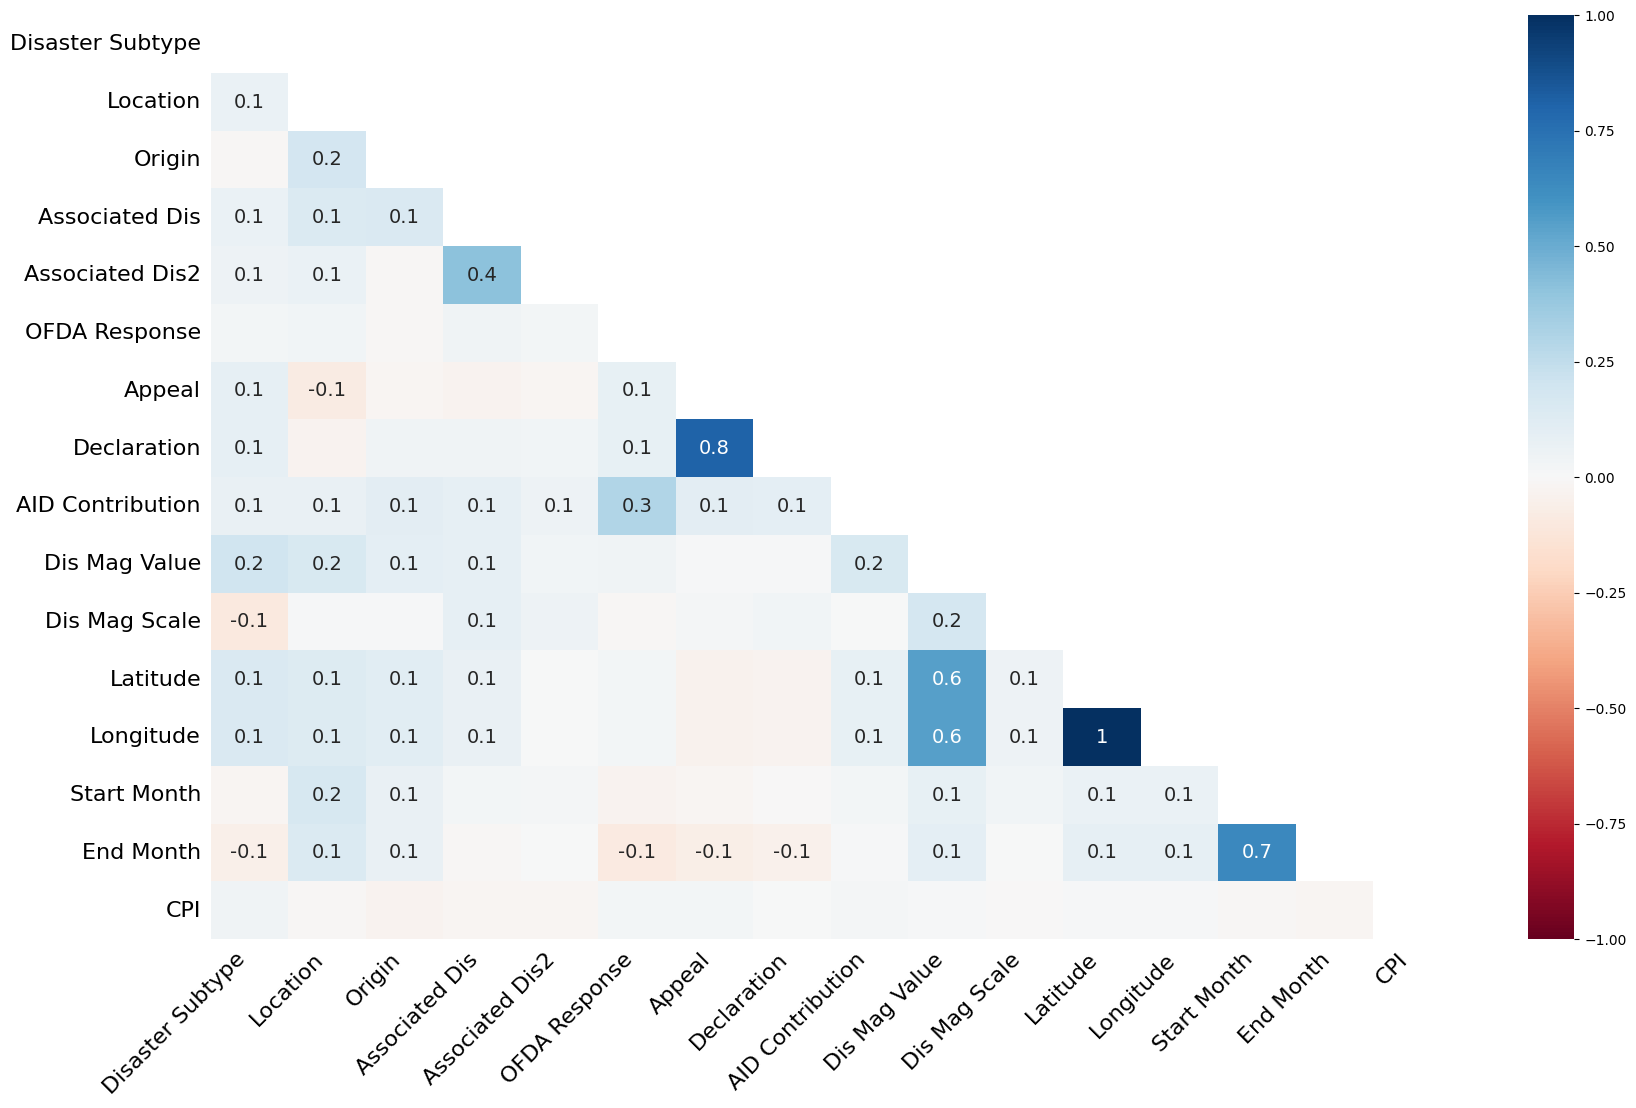

In [22]:
msno.heatmap(df)

### Dendogram

<Axes: >

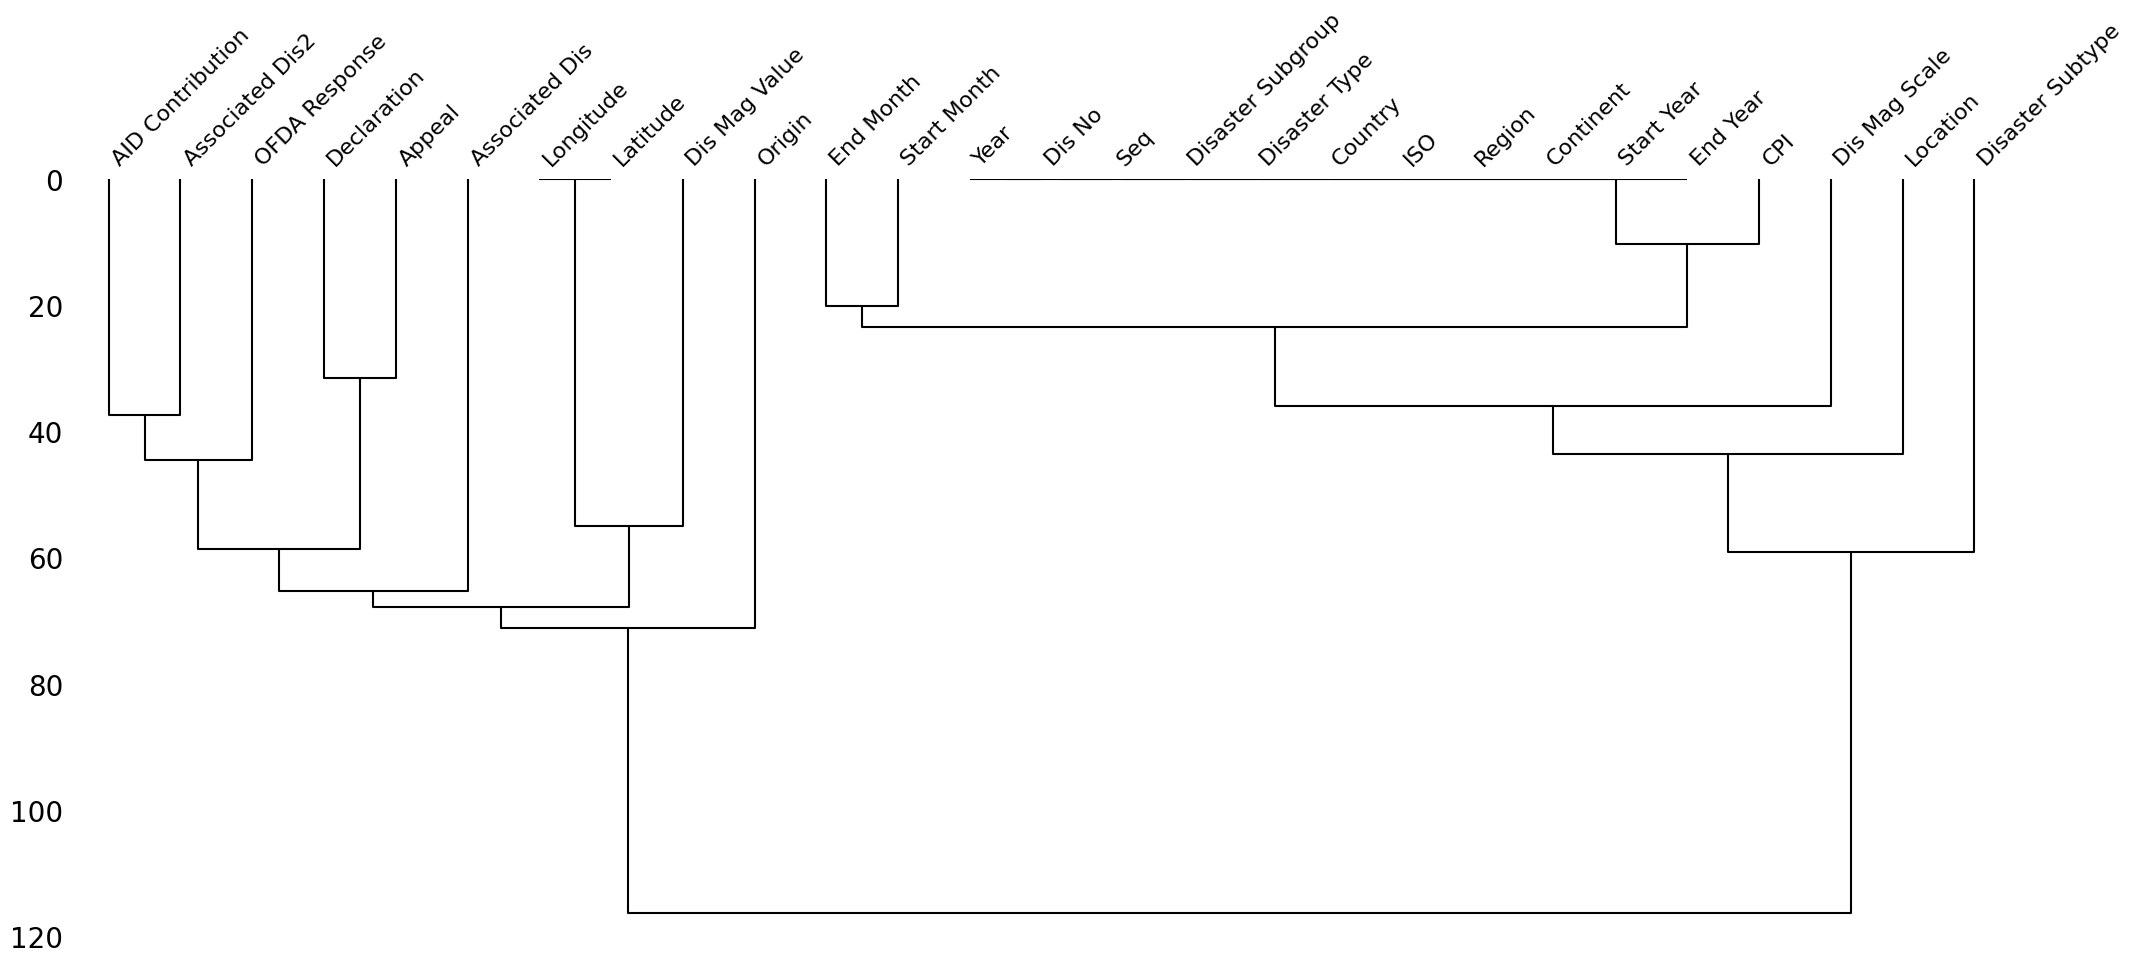

In [23]:
msno.dendrogram(df)

# Guardar dataset en csv

In [ ]:
df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.